In [1]:
# Code to genereate the graphs

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12 , 4)
sns.set_style('white')


In [2]:
# Load the data

df = pd.read_csv('./full_cleaned_UCS_05-01-2023.csv')

df.convert_dtypes()
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'])


In [3]:
df.count()

Date of Launch                        7560
Name of Satellite, Alternate Names    7560
Current Official Name of Satellite    7560
Country/Org of UN Registry            7559
Country of Operator/Owner             7560
Operator/Owner                        7560
Users                                 7560
Purpose                               7560
Detailed Purpose                      1254
Class of Orbit                        7560
Type of Orbit                         6909
Longitude of GEO (degrees)            7557
Perigee (km)                          7553
Apogee (km)                           7553
Eccentricity                          7549
Inclination (degrees)                 7556
Period (minutes)                      7504
Launch Mass (kg.)                     7315
Dry Mass (kg.)                         767
Power (watts)                          579
Date of Launch.1                      7560
Expected Lifetime (yrs.)              5450
Contractor                            7560
Country of 

In [4]:
geospatial_filter_list = [
    "Earth Observation",
    #"Technology Development",
    #"Navigation/Global Positioning",
    #"Technology Demonstration",
    "Earth Science",
    "Surveillance",
    #"Navigation/Regional Positioning",
    "Unknown",
    "Earth Observation/Navigation",
    #"Space Observation",
    "Earth Observation/Technology Development",
    "Meteorological",
    #"Communications/Maritime Tracking",
    "Earth/Space Observation",
    "Earth Observation",
    "Earth Observation/Communications",
    #"Mission Extension Technology",
    "Earth Observation/Communications/Space Science",
    "Earth Science/Earth Observation",
    #"Communications/Navigation",
    "Earth Observation/Space Science",
    "Earth Observation/Earth Science",
    #"Space Science/Technology Demonstration",
    #"Satellite Positioning"
]

In [5]:
# Categorizing purposes into 'Communications', 'Earth Observation', and 'Others'
def categorize_purpose(purpose):
    if purpose == "Communications":
        return "Communications"
    elif purpose in geospatial_filter_list:
        return "Earth Observation"
    else:
        return "Other"

df['Category'] = df['Purpose'].apply(categorize_purpose)


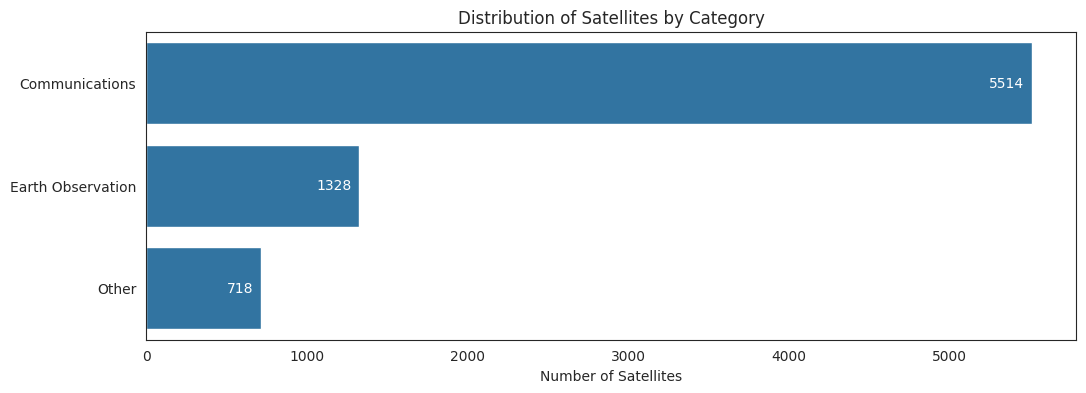

In [6]:
sns.countplot(y='Category', data=df, order=['Communications', 'Earth Observation', 'Other'])
plt.title('Distribution of Satellites by Category')
plt.xlabel('Number of Satellites')

# Add numbers to the bars
for i, count in enumerate(df['Category'].value_counts()):
    plt.annotate(count, (count -50,  i), ha='right', va='center', color='white')

plt.ylabel('')  # Remove the y-label

plt.show()

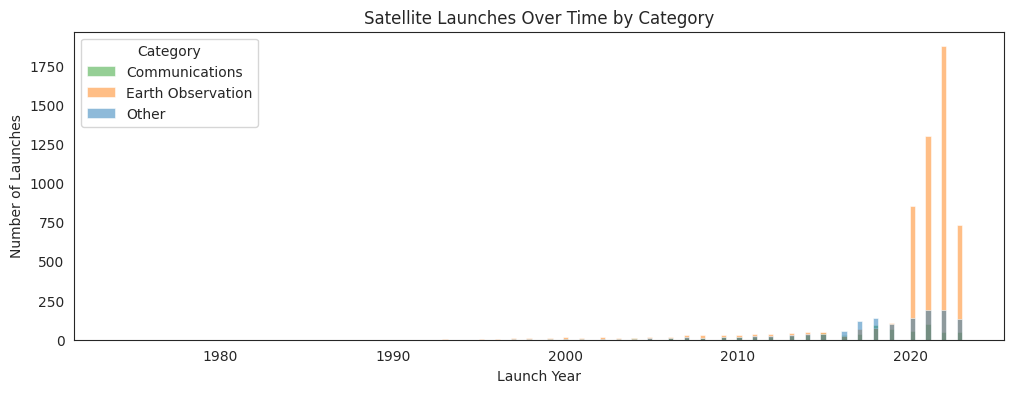

In [7]:
#Number of Satellite Launches Over Time

df['Launch Year'] = df['Date of Launch'].dt.year

sns.histplot(data=df, x='Launch Year', hue='Category')
plt.title('Satellite Launches Over Time by Category')
plt.xlabel('Launch Year')
plt.ylabel('Number of Launches')
plt.legend(title='Category', labels=['Communications', 'Earth Observation', 'Other'])

plt.show()

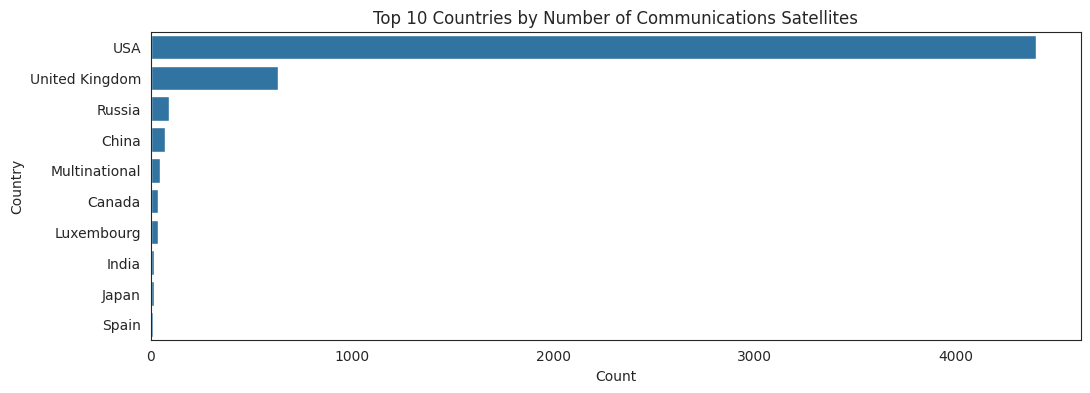

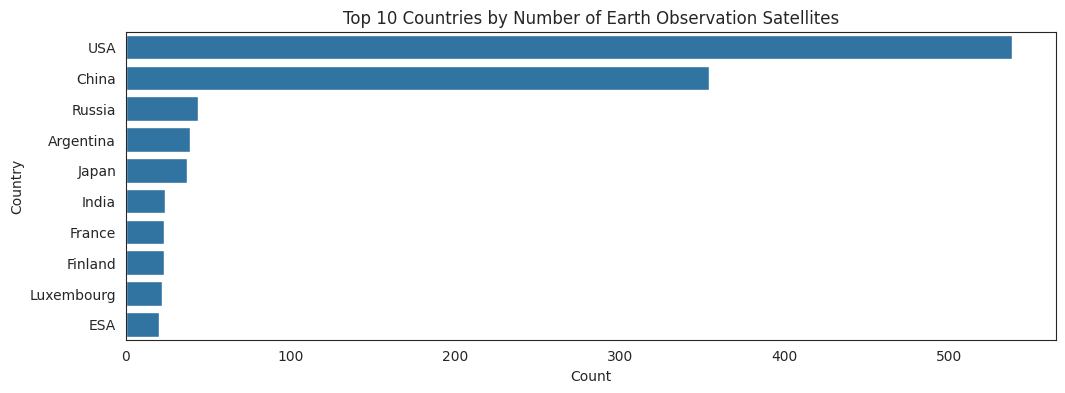

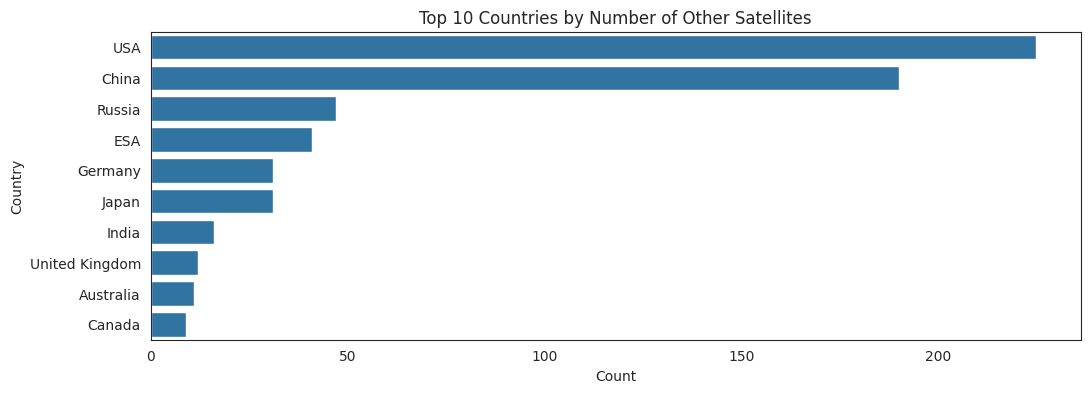

In [8]:
#Distribution of Satellites by Country of Operator
# Distribution of Satellites by Country of Operator

for category in ['Communications', 'Earth Observation', 'Other']:
    top_countries = df[df['Category'] == category]['Country of Operator/Owner'].value_counts().head(10).index.tolist()
    sns.countplot(y='Country of Operator/Owner', data=df[(df['Country of Operator/Owner'].isin(top_countries)) & (df['Category'] == category)], order=top_countries)
    plt.title(f'Top 10 Countries by Number of {category} Satellites')
    plt.xlabel('Count')
    plt.ylabel('Country')
    plt.show()

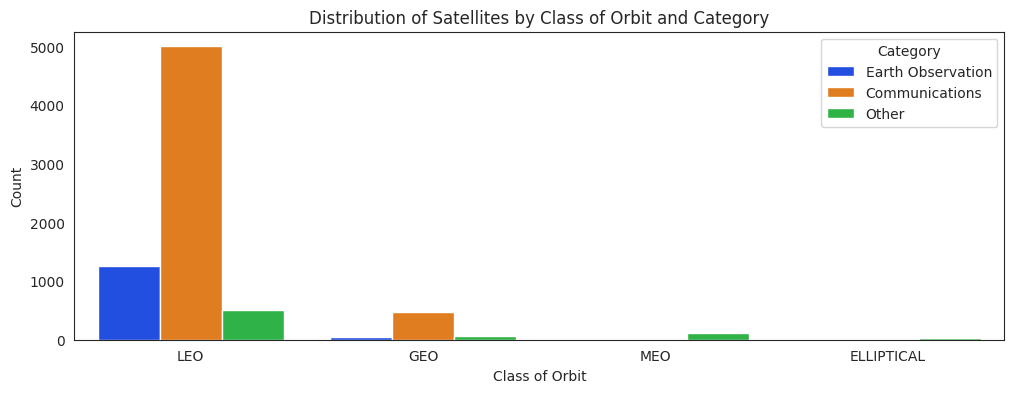

In [9]:
# Distribution of Satellites by Class of Orbit

sns.countplot(x='Class of Orbit', hue='Category', data=df, palette='bright')
plt.title('Distribution of Satellites by Class of Orbit and Category')
plt.xlabel('Class of Orbit')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

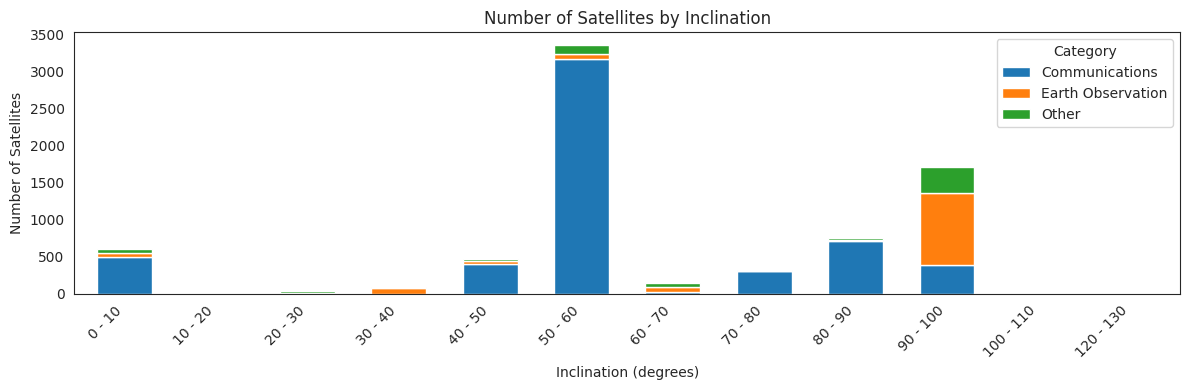

In [10]:
df['Inclination Binned'] = pd.cut(df['Inclination (degrees)'], bins=range(0, 140, 10), right=False)
cross_tab = pd.crosstab(index=df['Inclination Binned'], columns=df['Category'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, width=0.6)
plt.xlabel('Inclination (degrees)')
plt.ylabel('Number of Satellites')
plt.title('Number of Satellites by Inclination')
# Format x-tick labels to remove square brackets
xticks = [tick.get_text().replace(',', ' -').strip('[)]') for tick in plt.gca().get_xticklabels()]
plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45, fontsize=10, ha='right')

plt.tight_layout()
plt.savefig('eo_satellites_by_inclination_and_orbit_type.png')
plt.show()

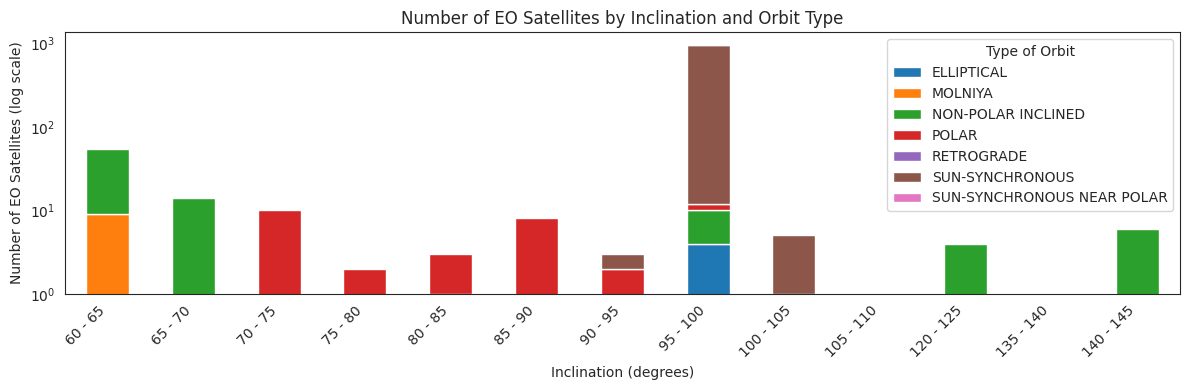

In [18]:
# Filter only EO satellites

df = df[df['Category'] == 'Earth Observation']

df['Inclination Binned'] = pd.cut(df['Inclination (degrees)'], bins=range(60, 150, 5), right=False)
cross_tab = pd.crosstab(index=df['Inclination Binned'], columns=df['Type of Orbit'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, width=0.5)
plt.xlabel('Inclination (degrees)')
plt.ylabel('Number of EO Satellites (log scale)')
plt.title('Number of EO Satellites by Inclination and Orbit Type')
plt.yscale('log')
xticks = [tick.get_text().replace(',', ' -').strip('[)]') for tick in plt.gca().get_xticklabels()]
plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('eo_satellites_by_inclination_and_orbit_type.png')
plt.show()